In [1]:
#!pip install -q snscrape
!pip install -q sastrawi

Disarankan run di notebook selain kaggle.
Kalau di run di kaggle tidak bisa nyimpan data likes, reply, dll.

In [2]:
import numpy as np 
import pandas as pd
import snscrape.modules.twitter as sns1
import itertools
from datetime import date
import re
import seaborn as sns

In [3]:
end_date = date.today()
start_date = '2022-8-20'
search_list = ['obat sirup', 'gagal ginjal', 'etilen glikol', 'BPOM', 'etilen glikol', 'dietilen glikol']
"""
Masalah yang diangkat dari topik adalah BPOM RI menyelidiki penyebaran obat sirup 
karena maraknya kasus gagal ginjal pada anak-anak yang diakibatkan oleh obat sirup, 
khususnya obat sirup yang mengandung etilen glikol atau dietilen glikol.
"""


numOfRows = 3000
search_term = ""

# not effective
# The result is, it returns fewer result than just Obat Sirup
for i in range(len(search_list)):
    if(i==0):
        search_term += search_list[i]
    else:
        search_term += " OR " + search_list[i]
print(search_term)

obat sirup OR gagal ginjal OR etilen glikol OR BPOM OR etilen glikol OR dietilen glikol


In [4]:
df = pd.DataFrame(itertools.islice(sns1.TwitterSearchScraper(f'inggris since:{start_date} until:{end_date}').get_items(), numOfRows))

    
#Menghindari masalah duplikat, tapi hati hati masalah karakter limit

# Data Cleaning

In [5]:
def unified_cleaning(string):
    try:
        string = string.lower() # Lower casing
    except:
        pass
    try:
        string = re.sub("@[A-Za-z0-9_]+","", string) # Remove HashTag and Mentions
    except:
        pass
    try:
        string = re.sub("#[A-Za-z0-9_]+","", string)
    except:
        pass
    try:
        string = re.sub(r"http\S+", "", string) # Remove url Links
    except:
        pass
    try:
        string = re.sub(r"www\S+", "", string)
    except:
        pass
    try:
        string = re.sub(r"t.co\S+", "", string)
    except:
        pass
    punctuation = "!=\-_][[}{;:'?/,.$%^&*()+"# Remove punctuation, need fix
    try:
        string = re.sub(punctuation, "",string)
    except:
        pass
    try:
        string = string.strip() 
    except:
        pass
    try:
        string = string.strip() # Remove whitespace
    except:
        pass
    
    return string
    
df['content'] = df['content'].apply(unified_cleaning)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13444\808488614.py:28: FutureWarning: Possible nested set at position 7
  string = re.sub(punctuation, "",string)


## Stemming

In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


In [7]:
stemmer = StemmerFactory().create_stemmer()

In [8]:
def stemming(string):
    try:
        string = stemmer.stem(string)
    except:
        pass
    return string

df['content'] = df['content'].apply(stemming)

In [9]:
df = df.drop('date', axis = 1)
df

,url,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,https://twitter.com/solidentinent/status/16020...,usaha iyaa karna tes nya juga pake bahasa ingg...,"@strawalpha @worksfess diusahakan iyaa, karna ...",1602070124839989251,"{'username': 'solidentinent', 'id': 1296633775...",0,0,0,0,1601611748146282496,...,None,None,None,1.602000e+18,"{'username': 'strawalpha', 'id': 1374906500737...","[{'username': 'strawalpha', 'id': 137490650073...",None,None,None,None
1,https://twitter.com/subenglishfess_/status/160...,oops kemarin salah tag nyata oke kalau mau les...,Oops kemarin salah tag ternyata 😭\n\nOke. Kala...,1602069780252758018,"{'username': 'subenglishfess_', 'id': 13706256...",0,0,0,0,1602069780252758018,...,None,None,None,NaN,None,"[{'username': 'cockatoocourse', 'id': 38694580...",None,None,None,None
2,https://twitter.com/kumparan/status/1602069729...,lama akhir pekan sabtu 10 12 dan minggu 11 12 ...,"Selama akhir pekan, Sabtu (10/12) dan Minggu (...",1602069729946263552,"{'username': 'kumparan', 'id': 759692754985242...",0,0,0,0,1602069729946263552,...,None,None,None,NaN,None,None,None,None,[kumparanBOLA],None
3,https://twitter.com/ballambinlove/status/16020...,liga spanyol inggris dan jerman jadi tonton le...,"@detikcom Liga spanyol, Inggris dan Jerman jad...",1602069351762313216,"{'username': 'ballambinlove', 'id': 114452217,...",0,0,0,0,1602068860823289859,...,None,None,None,1.602069e+18,"{'username': 'detikcom', 'id': 69183155, 'disp...","[{'username': 'detikcom', 'id': 69183155, 'dis...",None,None,None,None
4,https://twitter.com/AuisGrand/status/160206908...,mbappe mungkin hanya kameo di empat final namu...,Mbappe mungkin hanya kameo di perempat final. ...,1602069088913670145,"{'username': 'AuisGrand', 'id': 15043487457226...",0,0,0,0,1602069088913670145,...,None,None,None,NaN,None,None,None,None,"[Olahraga, AdadiKompas]",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,https://twitter.com/lutfialiyaeti/status/16018...,serius jujur padahal jagoin inggris sayang lat...,@registaco Serius jujur padahal jagoin inggris...,1601816839260340225,"{'username': 'lutfialiyaeti', 'id': 2566234758...",0,0,0,0,1601774382917255168,...,None,None,None,1.601774e+18,"{'username': 'registaco', 'id': 11567567815964...","[{'username': 'registaco', 'id': 1156756781596...",None,None,None,None
2996,https://twitter.com/stayelectrifyin/status/160...,bahasa inggris wkwkw bahasa inggris apa bahas ...,@exo1Iusin BAHASA INGGRIS WKWKW BAHASA INGGRIS...,1601816838899322880,"{'username': 'stayelectrifyin', 'id': 15489950...",1,0,0,1,1601815768601358336,...,None,None,None,1.601817e+18,"{'username': 'exo1Iusin', 'id': 15765102955974...","[{'username': 'exo1Iusin', 'id': 1576510295597...",None,None,None,None
2997,https://twitter.com/BisaBisanya_dik/status/160...,inggris pulkam a,@Hilmanmaarif Inggris pulkam a 😭,1601816832411074560,"{'username': 'BisaBisanya_dik', 'id': 11174547...",0,0,1,0,1601547971237380097,...,None,None,None,1.601548e+18,"{'username': 'Hilmanmaarif', 'id': 4914855380,...","[{'username': 'Hilmanmaarif', 'id': 4914855380...",None,None,None,None
2998,https://twitter.com/txtslots/status/1601816753...,menang tebak skor inggris vs prancis selamat m...,PEMENANG TEBAK SKOR\n\nINGGRIS VS PRANCIS\n\n@...,1601816753360629761,"{'username': 'txtslots', 'id': 107674803070601...",2,1,3,0,1601478490972299264,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,None,None,1.601478e+18,"{'username': 'txtslots', 'id': 107674803070601...","[{'username': 'badvud', 'id': 1587570310118662...",None,None,None,None


## Overlap Coefficient Algorithm

In [10]:
df = df.replace(r'^s*$',float('NaN'), regex=True)
df.dropna(subset = ['content'], inplace = True)
df.reset_index()

,index,url,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,https://twitter.com/solidentinent/status/16020...,usaha iyaa karna tes nya juga pake bahasa ingg...,"@strawalpha @worksfess diusahakan iyaa, karna ...",1602070124839989251,"{'username': 'solidentinent', 'id': 1296633775...",0,0,0,0,...,None,None,None,1.602000e+18,"{'username': 'strawalpha', 'id': 1374906500737...","[{'username': 'strawalpha', 'id': 137490650073...",None,None,None,None
1,1,https://twitter.com/subenglishfess_/status/160...,oops kemarin salah tag nyata oke kalau mau les...,Oops kemarin salah tag ternyata 😭\n\nOke. Kala...,1602069780252758018,"{'username': 'subenglishfess_', 'id': 13706256...",0,0,0,0,...,None,None,None,NaN,None,"[{'username': 'cockatoocourse', 'id': 38694580...",None,None,None,None
2,2,https://twitter.com/kumparan/status/1602069729...,lama akhir pekan sabtu 10 12 dan minggu 11 12 ...,"Selama akhir pekan, Sabtu (10/12) dan Minggu (...",1602069729946263552,"{'username': 'kumparan', 'id': 759692754985242...",0,0,0,0,...,None,None,None,NaN,None,None,None,None,[kumparanBOLA],None
3,3,https://twitter.com/ballambinlove/status/16020...,liga spanyol inggris dan jerman jadi tonton le...,"@detikcom Liga spanyol, Inggris dan Jerman jad...",1602069351762313216,"{'username': 'ballambinlove', 'id': 114452217,...",0,0,0,0,...,None,None,None,1.602069e+18,"{'username': 'detikcom', 'id': 69183155, 'disp...","[{'username': 'detikcom', 'id': 69183155, 'dis...",None,None,None,None
4,4,https://twitter.com/AuisGrand/status/160206908...,mbappe mungkin hanya kameo di empat final namu...,Mbappe mungkin hanya kameo di perempat final. ...,1602069088913670145,"{'username': 'AuisGrand', 'id': 15043487457226...",0,0,0,0,...,None,None,None,NaN,None,None,None,None,"[Olahraga, AdadiKompas]",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,2995,https://twitter.com/lutfialiyaeti/status/16018...,serius jujur padahal jagoin inggris sayang lat...,@registaco Serius jujur padahal jagoin inggris...,1601816839260340225,"{'username': 'lutfialiyaeti', 'id': 2566234758...",0,0,0,0,...,None,None,None,1.601774e+18,"{'username': 'registaco', 'id': 11567567815964...","[{'username': 'registaco', 'id': 1156756781596...",None,None,None,None
2980,2996,https://twitter.com/stayelectrifyin/status/160...,bahasa inggris wkwkw bahasa inggris apa bahas ...,@exo1Iusin BAHASA INGGRIS WKWKW BAHASA INGGRIS...,1601816838899322880,"{'username': 'stayelectrifyin', 'id': 15489950...",1,0,0,1,...,None,None,None,1.601817e+18,"{'username': 'exo1Iusin', 'id': 15765102955974...","[{'username': 'exo1Iusin', 'id': 1576510295597...",None,None,None,None
2981,2997,https://twitter.com/BisaBisanya_dik/status/160...,inggris pulkam a,@Hilmanmaarif Inggris pulkam a 😭,1601816832411074560,"{'username': 'BisaBisanya_dik', 'id': 11174547...",0,0,1,0,...,None,None,None,1.601548e+18,"{'username': 'Hilmanmaarif', 'id': 4914855380,...","[{'username': 'Hilmanmaarif', 'id': 4914855380...",None,None,None,None
2982,2998,https://twitter.com/txtslots/status/1601816753...,menang tebak skor inggris vs prancis selamat m...,PEMENANG TEBAK SKOR\n\nINGGRIS VS PRANCIS\n\n@...,1601816753360629761,"{'username': 'txtslots', 'id': 107674803070601...",2,1,3,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,None,None,1.601478e+18,"{'username': 'txtslots', 'id': 107674803070601...","[{'username': 'badvud', 'id': 1587570310118662...",None,None,None,None


In [74]:
df.columns

Index(['url', 'content', 'renderedContent', 'id', 'user', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang',
       'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags'],
      dtype='object')

In [86]:
def transformStringtoSet(string):
    temp = string
    temp = temp.split()
    temp = set(temp)
    return temp
def getOverlapJaccard(set1, set2):
    intersect = len(set1&set2)
    a = len(set1)
    b = len(set2)
    return (intersect/min(a,b)),(intersect/(a+b-intersect))
df_transformed = df.copy(deep = True)
# create Set Collumn
collumn = "content"
df_transformed["set_content"] = df_transformed[collumn].apply(
    lambda x: transformStringtoSet(x))
# Create Coef Collumn
temp_array = []
jaccard_array = []
coef_index = []
jaccard_index = []

for counti, i in enumerate(df_transformed["set_" + collumn]):
    final = 0
    final2 = 0
    temp1 = ""
    temp2 = ""
    for countj, j in enumerate(df_transformed["set_" + collumn]):
        if counti != countj:
            coef, jaccard = getOverlapJaccard(i, j)
            if final< coef:
                final = coef
                temp1 = df_transformed.iloc[countj]["content"]
            if final2 < jaccard:
                final2 = jaccard
                temp2 = df_transformed.iloc[countj]["content"]
    temp_array.append(final)
    jaccard_array.append(final2)
    coef_index.append(temp1)
    jaccard_index.append(temp2)
df_transformed["overlap_index"] = temp_array
df_transformed["jaccard_index"] = jaccard_array
df_transformed["coef_content"] = coef_index
df_transformed["jaccard_content"] = jaccard_index
df_transformed = df_transformed.drop(['retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang','id',	'replyCount',
       'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags'],axis =1)


In [103]:
#df_transformed.head()
#df_transformed.loc[df_transformed["overlap_index"]>0.8]['coef_content'].value_counts()
def printHighJaccardUser():
    username = [di['username'] for di in df_transformed.loc[df_transformed["jaccard_index"]>0.8]['user']]
    username = pd.DataFrame(username)
    print(username.value_counts())
printHighJaccardUser()

tauberitamedia    22
_BangFu           12
Linguosco         11
kompasiana        10
miakucink          9
                  ..
WinJGR             1
UZulviana          1
TryA_TINA          1
TomatZelo_YXe      1
yunjinbobo         1
Length: 168, dtype: int64


Text(0.5, 0, 'Index Jaccard')

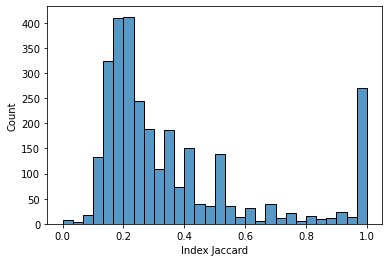

In [44]:
import matplotlib.pyplot as plt
sns.histplot(data=df_transformed, x="jaccard_content")
plt.xlabel("Index Jaccard")

Text(0.5, 0, 'Koefisien Tumpang Tindih')

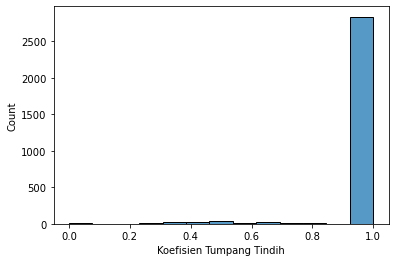

In [45]:
sns.histplot(data=df_transformed, x="coef_content")
plt.xlabel("Koefisien Tumpang Tindih")

In [145]:
# print(df_duplicate.loc[67]['content'])
# print("======")
# print(df_duplicate.loc[64]['content'])
df_transformed.content.str.count("kaesang").sum()

109

In [108]:
!pip install -q wordcloud
from wordcloud import WordCloud

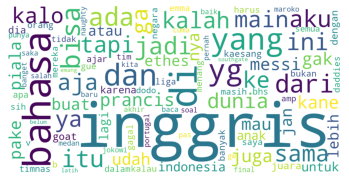

In [114]:
temp = pd.Series(df_transformed['content']).str.cat(sep=' ')
diagram = WordCloud(width=1600, height = 800, max_words = 100, collocations=False, background_color="white").generate(temp)

plt.imshow(diagram)
plt.axis("off")
plt.show()

In [105]:
#split df_transformed into 2
df_duplicate = df_transformed.copy(deep = True)
df_duplicate = df_duplicate.loc[df_duplicate["jaccard_index"]>=0.8]
df_transformed.drop(df_transformed[df_transformed['jaccard_index'] >= 0.8].index, inplace = True)

# Output Files

In [146]:
df_duplicate.to_excel('duplicate.xlsx', index = False, header=True)

In [147]:
df_transformed.to_excel('final.xlsx', index = False, header=True)
df.to_excel('raw.xlsx', index = False, header=True)